# WeatherPy
----

### Analysis

* There is a clear correlation bewteen latitude and temperature. The lower latitudes have higher temperatures and vice versa.
* When looking at the latitunde against either cloudiness or humidity it doesn't seem to show any trends.
* The method for randominly choosing cities may be providing a larger number of cities in the northen hemisphere, because of the higher population (more than 85% of the worlds population is in the northern hemisphere). It may be worth re-designing the method for randominly choosing cities in such way that the data contains a similar number of cities in each hemisphere.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, choosr size of 1500 becuase there will be some repetition and repeated cities will be removed afterwards
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count, need to be at least 500
len(cities)

584

# Perform API Calls

In [3]:
#setting up URL for openwathermap.org calls
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=Imperial&q="

#this list will hold the jsons with the weather data for each city
city_data = []

#Print header for data
print("beginning Data Retrieval     ")
print("----------------------------")

#set up counter for the cities loop
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + city
        
    #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
        pass



beginning Data Retrieval     
----------------------------
Processing Record 1 | okhotsk
Processing Record 2 | busselton
Processing Record 3 | alofi
Processing Record 4 | borogontsy
Processing Record 5 | severomuysk
Processing Record 6 | taolanaro
City taolanaro not found. Skipping to next city.
Processing Record 7 | bubaque
Processing Record 8 | kahului
Processing Record 9 | grand gaube
Processing Record 10 | bethel
Processing Record 11 | bluff
Processing Record 12 | sao gabriel da cachoeira
Processing Record 13 | dikson
Processing Record 14 | toamasina
Processing Record 15 | kaitangata
Processing Record 16 | ushuaia
Processing Record 17 | saldanha
Processing Record 18 | cape town
Processing Record 19 | atuona
Processing Record 20 | mar del plata
Processing Record 21 | shubarshi
Processing Record 22 | qaanaaq
Processing Record 23 | saskylakh
Processing Record 24 | hobart
Processing Record 25 | albany
Processing Record 26 | yellowknife
Processing Record 27 | souillac
Processing Record 

Processing Record 218 | mandalgovi
Processing Record 219 | geraldton
Processing Record 220 | la ronge
Processing Record 221 | siguatepeque
Processing Record 222 | providencia
Processing Record 223 | zyryanka
Processing Record 224 | caravelas
Processing Record 225 | sfantu gheorghe
Processing Record 226 | pushchino
Processing Record 227 | yomitan
City yomitan not found. Skipping to next city.
Processing Record 228 | yarmouth
Processing Record 229 | brooks
Processing Record 230 | mount isa
Processing Record 231 | san patricio
Processing Record 232 | mlonggo
Processing Record 233 | ulaangom
Processing Record 234 | pangai
Processing Record 235 | viedma
Processing Record 236 | bandarbeyla
Processing Record 237 | sola
Processing Record 238 | gazanjyk
Processing Record 239 | mizque
Processing Record 240 | kenai
Processing Record 241 | imbituba
Processing Record 242 | bonavista
Processing Record 243 | asyut
Processing Record 244 | khani
Processing Record 245 | sao filipe
Processing Record 246 

Processing Record 435 | almaznyy
Processing Record 436 | chagda
City chagda not found. Skipping to next city.
Processing Record 437 | beloha
Processing Record 438 | swinford
Processing Record 439 | jizan
Processing Record 440 | paracuru
Processing Record 441 | methoni
Processing Record 442 | bourail
Processing Record 443 | gualaquiza
Processing Record 444 | los llanos de aridane
Processing Record 445 | havoysund
Processing Record 446 | ahuimanu
Processing Record 447 | karkaralinsk
City karkaralinsk not found. Skipping to next city.
Processing Record 448 | raudeberg
Processing Record 449 | kimbe
Processing Record 450 | north bend
Processing Record 451 | tungkang
City tungkang not found. Skipping to next city.
Processing Record 452 | strezhevoy
Processing Record 453 | labrea
City labrea not found. Skipping to next city.
Processing Record 454 | jacmel
Processing Record 455 | vostok
Processing Record 456 | vila velha
Processing Record 457 | arteaga
Processing Record 458 | college
Processin

In [4]:
# convert array/json into df
city_data_pd = pd.DataFrame(city_data)

# get columns from df and place them into lists
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
with open('city_data.csv', mode='w') as output_data_file:
    city_data_pd.to_csv(output_data_file, index_label="City_ID")


#Show Record Count
city_data_pd.count()

City          519
Cloudiness    519
Country       519
Date          519
Humidity      519
Lat           519
Max Temp      519
Wind Speed    519
lng           519
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,okhotsk,88,RU,1554508184,77,59.36,36.30,6.62,143.24
1,busselton,0,AU,1554507909,56,-33.64,48.99,6.62,115.35
2,alofi,48,NU,1554505200,88,-19.06,80.60,9.17,-169.92
3,borogontsy,0,RU,1554508187,61,62.67,29.28,3.71,131.17
4,severomuysk,80,RU,1554508187,83,56.17,12.18,2.48,113.57


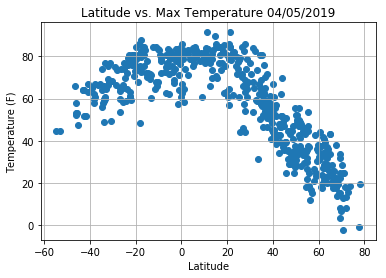

In [7]:
import time
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_pd['Lat'], city_data_pd['Max Temp'])
plt.title(f"Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")

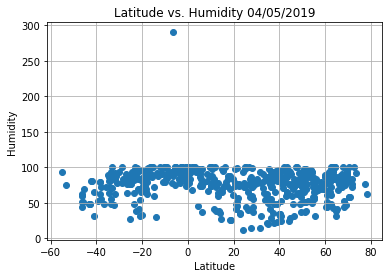

In [8]:
# Bulid scatter plot for Latitude vs. Humidity Plot

import time
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_pd['Lat'], city_data_pd['Humidity'])
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Humidity.png")

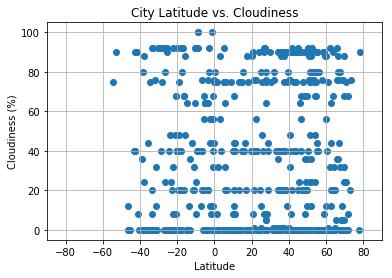

In [17]:
# Cloudiness (%) vs. Latitude
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)

# Save figure
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

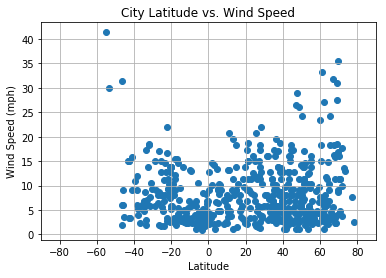

In [16]:
# Wind Speed (mph) vs. Latitude
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)

# Save figure
plt.savefig("Wind_Speed_vs_Lat.png")

# Show plot
plt.show()